In [317]:
import numpy as np
import pandas as pd
import seaborn as sns
import nibabel as nib
from nilearn import plotting, datasets
from nilearn.image import mean_img , index_img
from nilearn.image import new_img_like, resample_img
from nilearn.maskers import NiftiLabelsMasker , NiftiMasker

In [351]:
aal = datasets.fetch_atlas_aal(version = 'SPM12')
HOA = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
rest = nib.load(r'C:\Users\Nafir\Documents\Python in Neuroimaging\rest\dswusub-04_func_sub-04_task-rest_bold.nii')

In [369]:
aal.labels

['Precentral_L',
 'Precentral_R',
 'Frontal_Sup_L',
 'Frontal_Sup_R',
 'Frontal_Sup_Orb_L',
 'Frontal_Sup_Orb_R',
 'Frontal_Mid_L',
 'Frontal_Mid_R',
 'Frontal_Mid_Orb_L',
 'Frontal_Mid_Orb_R',
 'Frontal_Inf_Oper_L',
 'Frontal_Inf_Oper_R',
 'Frontal_Inf_Tri_L',
 'Frontal_Inf_Tri_R',
 'Frontal_Inf_Orb_L',
 'Frontal_Inf_Orb_R',
 'Rolandic_Oper_L',
 'Rolandic_Oper_R',
 'Supp_Motor_Area_L',
 'Supp_Motor_Area_R',
 'Olfactory_L',
 'Olfactory_R',
 'Frontal_Sup_Medial_L',
 'Frontal_Sup_Medial_R',
 'Frontal_Med_Orb_L',
 'Frontal_Med_Orb_R',
 'Rectus_L',
 'Rectus_R',
 'Insula_L',
 'Insula_R',
 'Cingulum_Ant_L',
 'Cingulum_Ant_R',
 'Cingulum_Mid_L',
 'Cingulum_Mid_R',
 'Cingulum_Post_L',
 'Cingulum_Post_R',
 'Hippocampus_L',
 'Hippocampus_R',
 'ParaHippocampal_L',
 'ParaHippocampal_R',
 'Amygdala_L',
 'Amygdala_R',
 'Calcarine_L',
 'Calcarine_R',
 'Cuneus_L',
 'Cuneus_R',
 'Lingual_L',
 'Lingual_R',
 'Occipital_Sup_L',
 'Occipital_Sup_R',
 'Occipital_Mid_L',
 'Occipital_Mid_R',
 'Occipital_Inf_L'

In [371]:
HOA.labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

In [335]:
aal.indices

['2001',
 '2002',
 '2101',
 '2102',
 '2111',
 '2112',
 '2201',
 '2202',
 '2211',
 '2212',
 '2301',
 '2302',
 '2311',
 '2312',
 '2321',
 '2322',
 '2331',
 '2332',
 '2401',
 '2402',
 '2501',
 '2502',
 '2601',
 '2602',
 '2611',
 '2612',
 '2701',
 '2702',
 '3001',
 '3002',
 '4001',
 '4002',
 '4011',
 '4012',
 '4021',
 '4022',
 '4101',
 '4102',
 '4111',
 '4112',
 '4201',
 '4202',
 '5001',
 '5002',
 '5011',
 '5012',
 '5021',
 '5022',
 '5101',
 '5102',
 '5201',
 '5202',
 '5301',
 '5302',
 '5401',
 '5402',
 '6001',
 '6002',
 '6101',
 '6102',
 '6201',
 '6202',
 '6211',
 '6212',
 '6221',
 '6222',
 '6301',
 '6302',
 '6401',
 '6402',
 '7001',
 '7002',
 '7011',
 '7012',
 '7021',
 '7022',
 '7101',
 '7102',
 '8101',
 '8102',
 '8111',
 '8112',
 '8121',
 '8122',
 '8201',
 '8202',
 '8211',
 '8212',
 '8301',
 '8302',
 '9001',
 '9002',
 '9011',
 '9012',
 '9021',
 '9022',
 '9031',
 '9032',
 '9041',
 '9042',
 '9051',
 '9052',
 '9061',
 '9062',
 '9071',
 '9072',
 '9081',
 '9082',
 '9100',
 '9110',
 '9120',
 

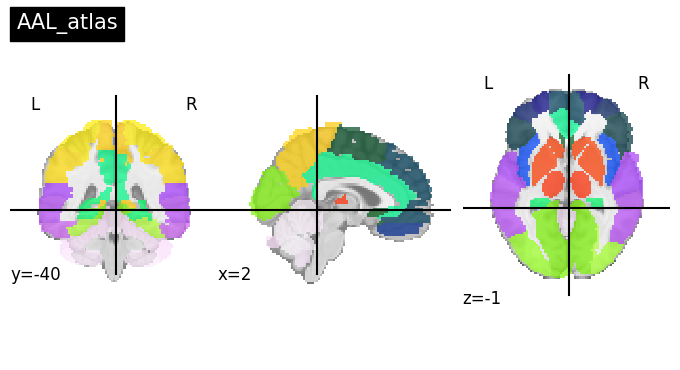

In [27]:
plotting.plot_roi(aal.maps, title="AAL_atlas")

In [337]:
masker = NiftiLabelsMasker(labels_img = HOA.filename, labels= HOA.labels)
masker.fit()
masker.generate_report()

C:\Users\Nafir\AppData\Local\Temp\ipykernel_604\350904283.py:3: UserWarning: No image provided to fit in NiftiLabelsMasker. Plotting ROIs of label image on the MNI152Template for reporting.
  masker.generate_report()


In [33]:
masker.labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

In [373]:
masker_AAL = NiftiLabelsMasker(labels_img = aal.maps, labels= aal.labels)
masker_AAL.fit()


C:\Users\Nafir\AppData\Local\Temp\ipykernel_604\3274931687.py:1: UserWarning: Mismatch between the number of provided labels (116) and the number of regions in provided label image (117).
  masker_AAL = NiftiLabelsMasker(labels_img = aal.maps, labels= aal.labels)


NiftiLabelsMasker(labels=['Precentral_L', 'Precentral_R', 'Frontal_Sup_L',
                          'Frontal_Sup_R', 'Frontal_Sup_Orb_L',
                          'Frontal_Sup_Orb_R', 'Frontal_Mid_L', 'Frontal_Mid_R',
                          'Frontal_Mid_Orb_L', 'Frontal_Mid_Orb_R',
                          'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R',
                          'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R',
                          'Frontal_Inf_Orb_L', 'Frontal_Inf_Orb_R',
                          'Rolandic_Oper_L', 'Rolandic_Oper_R',
                          'Supp_Motor_Area_L', 'Supp_Motor_Area_R',
                          'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L',
                          'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L',
                          'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R',
                          'Insula_L', 'Insula_R', ...],
                  labels_img='C:\\Users\\Nafir/nilearn_data\\aal_SPM12\\aal\\atlas\\AAL.nii')

In [377]:
#masker_AAL.generate_report()

In [65]:
tims = masker_AAL.fit_transform(rest)

C:\Users\Nafir\anaconda3\Lib\site-packages\nilearn\maskers\base_masker.py:253: UserWarning: Mismatch between the number of provided labels (116) and the number of regions in provided label image (117).
Note that this may be due to some regions being dropped from the label image after resampling.
  return self.transform_single_imgs(


In [67]:
tims.shape

(200, 116)

In [71]:
region_names = masker_AAL.region_names_

In [69]:
masker_AAL.region_names_

{0: 'Precentral_L',
 1: 'Precentral_R',
 2: 'Frontal_Sup_L',
 3: 'Frontal_Sup_R',
 4: 'Frontal_Sup_Orb_L',
 5: 'Frontal_Sup_Orb_R',
 6: 'Frontal_Mid_L',
 7: 'Frontal_Mid_R',
 8: 'Frontal_Mid_Orb_L',
 9: 'Frontal_Mid_Orb_R',
 10: 'Frontal_Inf_Oper_L',
 11: 'Frontal_Inf_Oper_R',
 12: 'Frontal_Inf_Tri_L',
 13: 'Frontal_Inf_Tri_R',
 14: 'Frontal_Inf_Orb_L',
 15: 'Frontal_Inf_Orb_R',
 16: 'Rolandic_Oper_L',
 17: 'Rolandic_Oper_R',
 18: 'Supp_Motor_Area_L',
 19: 'Supp_Motor_Area_R',
 20: 'Olfactory_L',
 21: 'Olfactory_R',
 22: 'Frontal_Sup_Medial_L',
 23: 'Frontal_Sup_Medial_R',
 24: 'Frontal_Med_Orb_L',
 25: 'Frontal_Med_Orb_R',
 26: 'Rectus_L',
 27: 'Rectus_R',
 28: 'Insula_L',
 29: 'Insula_R',
 30: 'Cingulum_Ant_L',
 31: 'Cingulum_Ant_R',
 32: 'Cingulum_Mid_L',
 33: 'Cingulum_Mid_R',
 34: 'Cingulum_Post_L',
 35: 'Cingulum_Post_R',
 36: 'Hippocampus_L',
 37: 'Hippocampus_R',
 38: 'ParaHippocampal_L',
 39: 'ParaHippocampal_R',
 40: 'Amygdala_L',
 41: 'Amygdala_R',
 42: 'Calcarine_L',
 43: '

In [387]:
tims_df = pd.DataFrame(tims, columns = region_names.values())

In [389]:
tims_df

,Precentral_L,Precentral_R,Frontal_Sup_L,Frontal_Sup_R,Frontal_Sup_Orb_L,Frontal_Sup_Orb_R,Frontal_Mid_L,Frontal_Mid_R,Frontal_Mid_Orb_L,Frontal_Mid_Orb_R,...,Cerebelum_10_L,Cerebelum_10_R,Vermis_1_2,Vermis_3,Vermis_4_5,Vermis_6,Vermis_7,Vermis_8,Vermis_9,Vermis_10
0,104.099495,101.158882,103.902885,114.166786,70.105721,72.675102,106.595451,114.297310,79.589287,88.717323,...,82.454140,59.313660,113.353172,127.718147,124.157158,125.625153,122.581909,111.656448,111.852402,133.880554
1,104.042374,101.066231,103.950333,114.117485,70.158165,72.851334,106.725937,114.325287,79.569489,88.964600,...,82.428207,59.347187,111.883392,127.806961,124.076660,125.360924,122.398445,111.372444,111.932198,133.864578
2,104.053741,101.169235,103.907570,114.169914,70.114883,72.730858,106.608757,114.280937,79.623337,88.789772,...,82.412064,59.366035,112.639496,127.651932,124.153641,125.636284,122.569588,111.631531,111.861488,133.717178
3,104.185837,101.245232,103.837631,114.238129,70.018112,72.538383,106.476425,114.305832,79.650414,88.475372,...,82.431694,59.283375,114.689301,127.645103,124.224945,125.865456,122.795509,111.792572,111.780609,134.336060
4,104.213844,101.074478,103.860977,114.220085,69.972946,72.667679,106.612099,114.446945,79.573631,88.619675,...,82.332703,59.192707,114.212166,128.070099,124.156799,125.603355,122.603195,111.442215,111.922813,134.471146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,104.095940,101.463226,103.817146,114.143753,70.001503,72.667496,106.332802,114.408394,79.266769,88.513245,...,82.297729,59.356735,113.484489,127.661697,124.288040,125.684044,122.599152,111.722343,112.242706,133.519272
196,104.048676,101.386208,103.745750,114.294884,69.943466,72.646103,106.220955,114.357170,79.370461,88.679062,...,82.247238,59.529366,112.747925,127.649414,124.515938,125.631470,122.857155,111.433861,111.966721,132.705612
197,104.175804,101.115829,103.887108,114.256935,70.043968,72.787781,106.449829,114.312317,79.513893,88.811569,...,82.379486,59.167641,112.315559,127.924438,124.188660,125.465286,122.423340,111.435860,111.776375,133.213470
198,104.313972,101.086166,104.046204,114.086525,70.110847,72.802704,106.630722,114.174271,79.541130,88.828758,...,82.709587,59.094070,112.666786,128.040634,124.093643,125.539261,122.189537,111.564926,111.773529,133.757187


<Axes: >

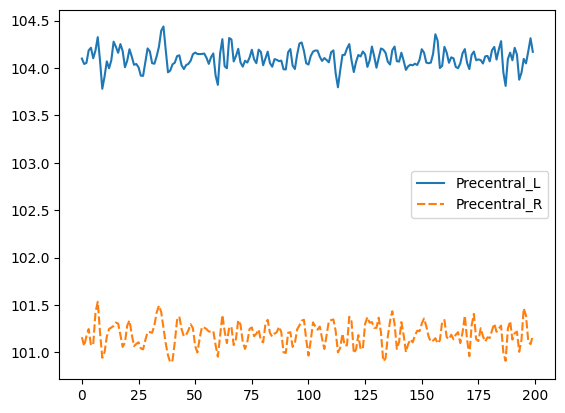

In [391]:
sns.lineplot(tims_df[['Precentral_L', 'Precentral_R']])

In [103]:
aal.labels

['Precentral_L',
 'Precentral_R',
 'Frontal_Sup_L',
 'Frontal_Sup_R',
 'Frontal_Sup_Orb_L',
 'Frontal_Sup_Orb_R',
 'Frontal_Mid_L',
 'Frontal_Mid_R',
 'Frontal_Mid_Orb_L',
 'Frontal_Mid_Orb_R',
 'Frontal_Inf_Oper_L',
 'Frontal_Inf_Oper_R',
 'Frontal_Inf_Tri_L',
 'Frontal_Inf_Tri_R',
 'Frontal_Inf_Orb_L',
 'Frontal_Inf_Orb_R',
 'Rolandic_Oper_L',
 'Rolandic_Oper_R',
 'Supp_Motor_Area_L',
 'Supp_Motor_Area_R',
 'Olfactory_L',
 'Olfactory_R',
 'Frontal_Sup_Medial_L',
 'Frontal_Sup_Medial_R',
 'Frontal_Med_Orb_L',
 'Frontal_Med_Orb_R',
 'Rectus_L',
 'Rectus_R',
 'Insula_L',
 'Insula_R',
 'Cingulum_Ant_L',
 'Cingulum_Ant_R',
 'Cingulum_Mid_L',
 'Cingulum_Mid_R',
 'Cingulum_Post_L',
 'Cingulum_Post_R',
 'Hippocampus_L',
 'Hippocampus_R',
 'ParaHippocampal_L',
 'ParaHippocampal_R',
 'Amygdala_L',
 'Amygdala_R',
 'Calcarine_L',
 'Calcarine_R',
 'Cuneus_L',
 'Cuneus_R',
 'Lingual_L',
 'Lingual_R',
 'Occipital_Sup_L',
 'Occipital_Sup_R',
 'Occipital_Mid_L',
 'Occipital_Mid_R',
 'Occipital_Inf_L'

In [149]:
aal.labels

['Precentral_L',
 'Precentral_R',
 'Frontal_Sup_L',
 'Frontal_Sup_R',
 'Frontal_Sup_Orb_L',
 'Frontal_Sup_Orb_R',
 'Frontal_Mid_L',
 'Frontal_Mid_R',
 'Frontal_Mid_Orb_L',
 'Frontal_Mid_Orb_R',
 'Frontal_Inf_Oper_L',
 'Frontal_Inf_Oper_R',
 'Frontal_Inf_Tri_L',
 'Frontal_Inf_Tri_R',
 'Frontal_Inf_Orb_L',
 'Frontal_Inf_Orb_R',
 'Rolandic_Oper_L',
 'Rolandic_Oper_R',
 'Supp_Motor_Area_L',
 'Supp_Motor_Area_R',
 'Olfactory_L',
 'Olfactory_R',
 'Frontal_Sup_Medial_L',
 'Frontal_Sup_Medial_R',
 'Frontal_Med_Orb_L',
 'Frontal_Med_Orb_R',
 'Rectus_L',
 'Rectus_R',
 'Insula_L',
 'Insula_R',
 'Cingulum_Ant_L',
 'Cingulum_Ant_R',
 'Cingulum_Mid_L',
 'Cingulum_Mid_R',
 'Cingulum_Post_L',
 'Cingulum_Post_R',
 'Hippocampus_L',
 'Hippocampus_R',
 'ParaHippocampal_L',
 'ParaHippocampal_R',
 'Amygdala_L',
 'Amygdala_R',
 'Calcarine_L',
 'Calcarine_R',
 'Cuneus_L',
 'Cuneus_R',
 'Lingual_L',
 'Lingual_R',
 'Occipital_Sup_L',
 'Occipital_Sup_R',
 'Occipital_Mid_L',
 'Occipital_Mid_R',
 'Occipital_Inf_L'

In [151]:
aal.indices

['2001',
 '2002',
 '2101',
 '2102',
 '2111',
 '2112',
 '2201',
 '2202',
 '2211',
 '2212',
 '2301',
 '2302',
 '2311',
 '2312',
 '2321',
 '2322',
 '2331',
 '2332',
 '2401',
 '2402',
 '2501',
 '2502',
 '2601',
 '2602',
 '2611',
 '2612',
 '2701',
 '2702',
 '3001',
 '3002',
 '4001',
 '4002',
 '4011',
 '4012',
 '4021',
 '4022',
 '4101',
 '4102',
 '4111',
 '4112',
 '4201',
 '4202',
 '5001',
 '5002',
 '5011',
 '5012',
 '5021',
 '5022',
 '5101',
 '5102',
 '5201',
 '5202',
 '5301',
 '5302',
 '5401',
 '5402',
 '6001',
 '6002',
 '6101',
 '6102',
 '6201',
 '6202',
 '6211',
 '6212',
 '6221',
 '6222',
 '6301',
 '6302',
 '6401',
 '6402',
 '7001',
 '7002',
 '7011',
 '7012',
 '7021',
 '7022',
 '7101',
 '7102',
 '8101',
 '8102',
 '8111',
 '8112',
 '8121',
 '8122',
 '8201',
 '8202',
 '8211',
 '8212',
 '8301',
 '8302',
 '9001',
 '9002',
 '9011',
 '9012',
 '9021',
 '9022',
 '9031',
 '9032',
 '9041',
 '9042',
 '9051',
 '9052',
 '9061',
 '9062',
 '9071',
 '9072',
 '9081',
 '9082',
 '9100',
 '9110',
 '9120',
 

In [383]:
lable_ind =aal.labels.index('Hippocampus_L')
region_index = aal.indices[lable_ind]

In [381]:
lable_ind =aal.labels.index('Hippocampus_L')
lable_ind

36

In [ ]:
region_index = aal.indices[lable_ind]

In [385]:
region_index

'4101'

In [345]:
aal_img = nib.load(aal.maps)

In [349]:
aal_img.get_fdata().max()

9170.0

In [187]:
float(region_index)

4101.0

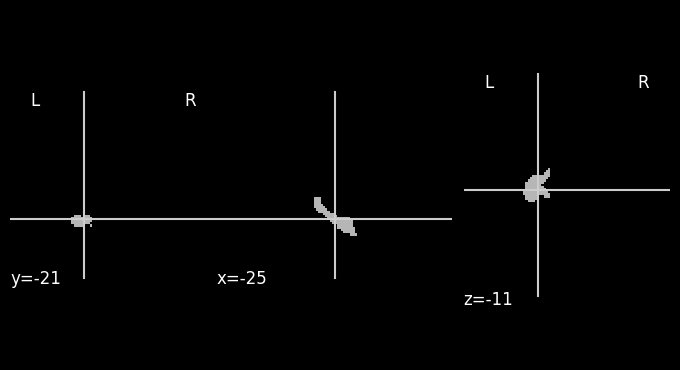

In [189]:
region_mask = (aal_img.get_fdata() == float(region_index))
region_img = new_img_like(nib.load(aal.maps), region_mask)
nib.save(region_img, 'Hippocampus_L.nii')
plotting.plot_anat(region_img)

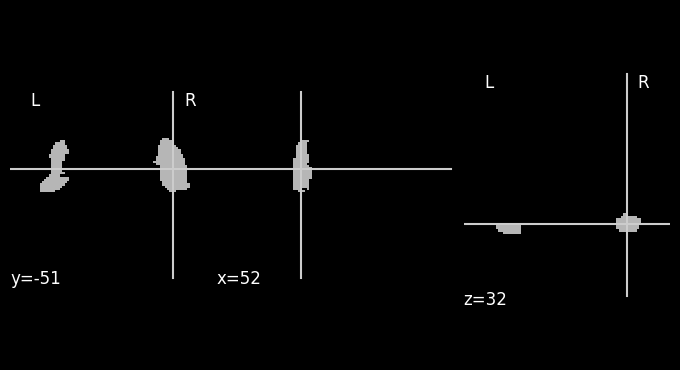

In [115]:
region_mask = (HOA.maps.get_fdata() == 21)

HOA.labels.index('Angular Gyrus')
region_img = new_img_like(HOA.maps, region_mask)
nib.save(region_img, 'angular.nii')
plotting.plot_anat(region_img)

In [191]:
rest.shape

(91, 109, 91, 200)

In [193]:
region_img.shape

(91, 109, 91)

In [195]:
rest_data = rest.get_fdata()
roi_data = region_img.get_fdata()

#image = image[..., np.newaxis]


In [197]:
roi_data = roi_data[..., np.newaxis]

In [199]:
roi_data.shape

(91, 109, 91, 1)

In [201]:
masked_fmri_data = rest_data * roi_data


In [203]:
masked_fmri_data.shape

(91, 109, 91, 200)

In [205]:
masked_fmri_img = nib.Nifti1Image(masked_fmri_data, affine=rest.affine, header=rest.header)

nib.save(masked_fmri_img, 'hipp_fmri.nii')

In [301]:
anat= nib.load(r'C:\Users\Nafir\Documents\Python in Neuroimaging\sub-02_anat_sub-02_T1w.nii')

roi_img = nib.load(r'D:\course\fMRI_processing_May2024\CONN\mask\DLPFC.nii')

anat_data = anat.get_fdata()
mask_data = roi_img.get_fdata()


In [289]:
anat.shape

(256, 256, 176)

In [291]:
roi_img.shape

(91, 109, 91)

In [293]:
resampled_anat = resample_img(anat, target_affine=roi_img.affine, target_shape=roi_img.shape, interpolation='nearest')
resampled_anat_data = resampled_anat.get_fdata()

In [295]:
masked_anat = resampled_anat_data * mask_data

In [297]:
masked_anat.shape

(91, 109, 91)

In [265]:
masked_anat_img = nib.Nifti1Image(masked_anat, roi_img.affine, roi_img.header)

In [267]:
nib.save(masked_anat_img, 'masked_anat_dlpfc.nii')

In [299]:
anat_img = nib.Nifti1Image(resampled_anat_data, resampled_anat.affine, resampled_anat.header)
nib.save(anat_img, 'resm4anat.nii')

In [2]:
#### use SPM FSL